In [100]:
import pandas as pd

In [101]:
df = pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [102]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [103]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [104]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [105]:
print(f"""
Shape: {df.shape}
Tot size: {df.size}
""")


Shape: (10886, 12)
Tot size: 130632



In [106]:
df["datetime"][0][11:]

'00:00:00'

In [107]:
def convertDatetime(x):
    time = x[11:]
    hour = time[:2]
    hour = int(hour)
    return hour

df["time"] = df["datetime"].apply(convertDatetime)
# df["time"] = df["datetime"].apply(lambda x: int(x[11:13]))
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [108]:
df = df.drop("datetime", axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Create model

In [109]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [110]:
X = df.drop("count", axis=1)
y = df["count"]

In [111]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,4


In [112]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [115]:
print(f"""
X_train size: {X_train.shape}
X_test size: {X_test.shape}

y_train size: {len(y_train)}
y_test size: {len(y_test)}
""")


X_train size: (8164, 11)
X_test size: (2722, 11)

y_train size: 8164
y_test size: 2722



In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [118]:
print(f"""
Size of pred: {len(pred)}
""")


Size of pred: 2722



In [119]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [120]:
mea = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
print(f"""
Mean absolute error: {mea}
Mean absolute percentage error: {mape}
""")


Mean absolute error: 1.385991917707568
Mean absolute percentage error: 0.006822891183174697



In [121]:
import matplotlib.pyplot as plt

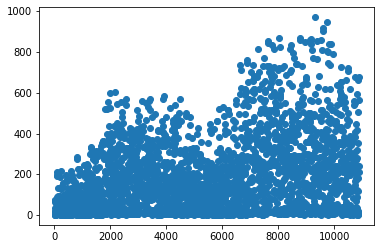

In [123]:
plt.scatter(X_test.index, y_test)
plt.show()